In [1]:
#importing package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
#read csv
df = pd.read_csv('hotel_bookings_data.csv')

#showing all columns
pd.set_option('display.max_columns', None)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
#dataframe general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
#total missing value
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

# Statistical Summary

In [5]:
# columns grouping by data type (categorical or numerical)
nums = ['is_canceled', 'lead_time', 'arrival_date_year','arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies','is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes','agent', 'company', 'days_in_waiting_list','adr','required_car_parking_spaces', 'total_of_special_requests']
cats = ['hotel', 'arrival_date_month','meal','city', 'market_segment', 'distribution_channel','deposit_type','customer_type','reservation_status']

In [6]:
df[nums].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df[cats].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


# Data Preprocessing

## Handling Missing Value

In [8]:
df['children'] = df['children'].fillna(0)
df['city'] = df['city'].fillna('Unknown')
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

In [9]:
#total missing value after handling
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Replace Value in Meal Column

In [10]:
df['meal'] = df['meal'].replace(['Undefined'], 'No Meal')
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

## Drop Unrequired Value

In [11]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_guests'].value_counts()

2.0     82051
1.0     22581
3.0     10495
4.0      3929
0.0       180
5.0       137
26.0        5
12.0        2
27.0        2
20.0        2
10.0        2
40.0        1
50.0        1
55.0        1
6.0         1
Name: total_guests, dtype: int64

In [12]:
#drop row that has 0 total guest
df.drop(df[df['total_guests'] == 0].index, inplace = True)
df['total_guests'].value_counts()

2.0     82051
1.0     22581
3.0     10495
4.0      3929
5.0       137
26.0        5
12.0        2
27.0        2
20.0        2
10.0        2
40.0        1
50.0        1
55.0        1
6.0         1
Name: total_guests, dtype: int64

# Monthly Hotel Booking Analysis

## Agregat Table

In [13]:
#Total monthly hotel booking
df1 = df.groupby(['hotel','arrival_date_month','arrival_date_year'])['hotel'].count().reset_index(name='total')
df1.sample(5)

,hotel,arrival_date_month,arrival_date_year,total
26,Resort Hotel,April,2018,1519
46,Resort Hotel,October,2017,1409
41,Resort Hotel,March,2019,1307
28,Resort Hotel,August,2018,1369
9,City Hotel,January,2018,3103


## Sort Table by Month

In [14]:
#sort table based on month
sort_month = ['January','February','March','April','May','June','July','August','September','October','November','December']
df1.index = pd.CategoricalIndex(df1['arrival_date_month'],categories = sort_month,ordered = True)
df2 = df1.sort_index().reset_index(drop = True)

#shorten month values
df2['arrival_date_month'] = df2['arrival_date_month'].str[0:3]
df2.head()

,hotel,arrival_date_month,arrival_date_year,total
0,Resort Hotel,Jan,2017,1104
1,Resort Hotel,Jan,2018,1331
2,City Hotel,Jan,2017,1233
3,City Hotel,Jan,2018,3103
4,Resort Hotel,Feb,2017,1264


## Visualization

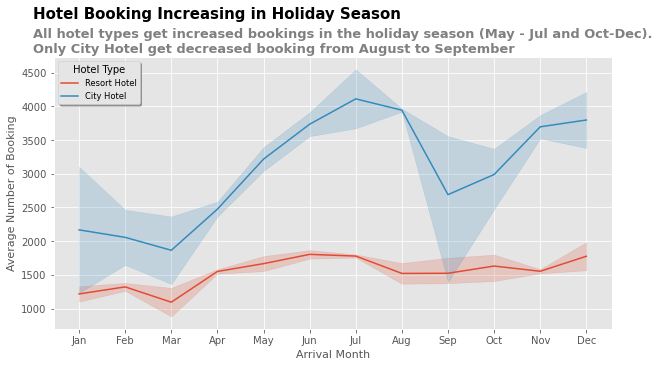

In [15]:
#making lineplot
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
sns.lineplot(x='arrival_date_month', y='total', data = df2, hue = 'hotel')
plt.legend(title = 'Hotel Type', loc = 'upper left', shadow = True, fontsize = 'small')
plt.xlabel("Arrival Month", fontsize = 11)
plt.ylabel("Average Number of Booking", fontsize = 11)

#giving title
plt.text(x= -1, y = 5300, s = 'Hotel Booking Increasing in Holiday Season', size = 15, weight = 'bold')
plt.text(x= -1, y = 4800, s = 'All hotel types get increased bookings in the holiday season (May - Jul and Oct-Dec). \nOnly City Hotel get decreased booking from August to September', weight = 'bold',size = 13, color = 'grey');

# Stay Duration and Hotel Bookings Cancellation Rates Correlation

## Making new stayed duration columns

In [16]:
#adding total days_stayed columns
df['days_stayed'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']

In [17]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,days_stayed
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0,2


## Grouping `days_stayed` value

In [18]:
df3 = df
days_stayed_list = []

for i, kolom in df3.iterrows():
    prefix = kolom['days_stayed']
    if prefix < 15 :
        days_stayed = prefix
    elif prefix >= 15 and prefix < 31 :
        days_stayed = 15
    else :
        days_stayed = 30
        
    days_stayed_list.append(days_stayed)

df3['days_stayed'] = days_stayed_list

df3.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,days_stayed
40615,City Hotel,1,28,2017,October,32,3,1,3,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,1.0,0.0,0,Family,62.0,0,0,Canceled,2.0,4
1589,Resort Hotel,0,25,2017,November,36,5,1,1,2,0.0,0,Breakfast,Kabupaten Sleman,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,139.5,1,1,Check-Out,2.0,2
76469,City Hotel,1,379,2017,December,44,31,1,1,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,1,0,0,Non Refund,1.0,0.0,0,Personal,62.0,0,0,Canceled,2.0,2
22042,Resort Hotel,0,32,2019,March,5,30,1,0,1,0.0,0,Breakfast,Kota Denpasar,Corporate,Corporate,1,1,7,0,No Deposit,0.0,113.0,0,Personal,42.0,1,0,Check-Out,1.0,1
4892,Resort Hotel,1,85,2018,June,15,7,0,3,2,0.0,0,Dinner,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,67.0,0.0,0,Family,64.0,0,0,Canceled,2.0,3


## Total canceled hotel booking and stay duration comparison for each type of hotel

In [19]:
#Aggregate
df3 = df3.groupby(['days_stayed','hotel','is_canceled'])['is_canceled'].count().reset_index(name='total_canceled_status')

#add percentage column 
df3['percentage'] = df3['total_canceled_status'] / df3.groupby(['days_stayed','hotel'])['total_canceled_status'].transform('sum') *100

#showing only canceled booking 
df3.drop(df3[df3['is_canceled'] == 0].index, inplace = True)
df3.sample(5)

,days_stayed,hotel,is_canceled,total_canceled_status,percentage
61,15,City Hotel,1,115,77.702703
55,13,Resort Hotel,1,25,25.000000
57,14,City Hotel,1,71,73.195876
7,1,Resort Hotel,1,1168,15.076804
47,11,Resort Hotel,1,74,23.566879


## Visualization

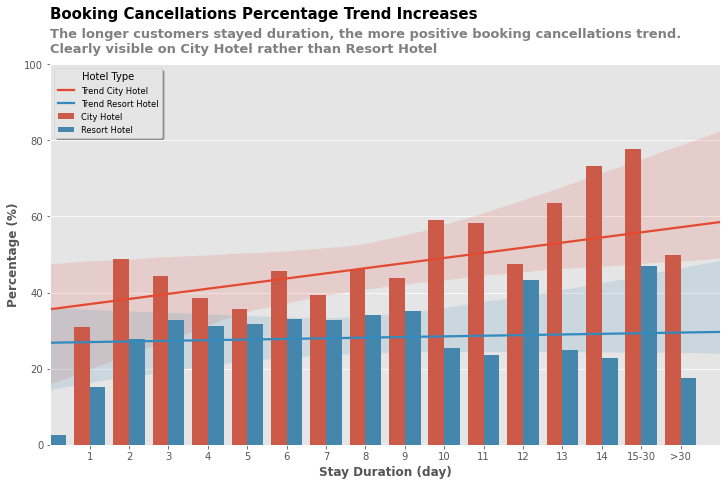

In [20]:
plt.style.use('ggplot')
plt.figure(figsize = (12,7)) #set figure height and width

sns.regplot(x='days_stayed', y='percentage', data=df3[df3['hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel') #add trendline
sns.regplot(x='days_stayed', y='percentage', data=df3[df3['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel') #add trendline
sns.barplot(x= 'days_stayed', y = 'percentage', data = df3, hue = 'hotel') #add barplot

plt.legend(title = 'Hotel Type', loc = 'upper left', shadow = True, fontsize = 'small') #setting legend
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,'15-30','>30']) #change x-axis value
plt.axis([0, 17, 0, 100]) #set y-axis limit

plt.xlabel("Stay Duration (day)", weight = 'bold', size = 12) #change x label name
plt.ylabel("Percentage (%)", weight = 'bold', size = 12) #change y label name

#giving title
plt.text(x= 0, y = 112, s = 'Booking Cancellations Percentage Trend Increases', size = 15, weight = 'bold')
plt.text(x= 0, y = 103, s = 'The longer customers stayed duration, the more positive booking cancellations trend.\nClearly visible on City Hotel rather than Resort Hotel', weight = 'bold',size = 13, color = 'grey');

# Analysis of Lead Time on Hotel Bookings Cancellation Rate

## Making new categorize column

In [21]:
df['lead_time'].describe()

count    119210.000000
mean        104.109227
std         106.875450
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         737.000000
Name: lead_time, dtype: float64

Average value of `lead_time` is bigger than median. It means it has a big outlier and the distribution is skewed right. The maximum value is much bigger than minimum value, it also means that this column has a various values

In [33]:
df4 = df
letime_list = []

for i, kolom in df4.iterrows():
    prefix = kolom['lead_time']
    if prefix <= 30 :
        letime = '0-30'
    elif prefix <= 60 :
        letime = '31-60'
    elif prefix <= 90 :
        letime = '61-90'
    elif prefix <= 120 :
        letime = '91-120'
    elif prefix <= 150 :
        letime = '121-150'
    elif prefix <= 180 :
        letime = '151-180'
    elif prefix <= 210 :
        letime = '181-210'
    elif prefix <= 240 :
        letime = '211-240'
    elif prefix <= 270 :
        letime = '241-270'
    elif prefix <= 300 :
        letime = '271-300'
    elif prefix <= 330 :
        letime = '301-330'
    elif prefix <= 360 :
        letime = '331-360'
    elif prefix <= 390 :
        letime = '361-390'
    elif prefix <= 420 :
        letime = '391-420'
    else :
        letime = '> 420'
        
    letime_list.append(letime)

df4['letime_group'] = letime_list

df4.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,days_stayed,letime_group
64729,City Hotel,1,92,2019,May,11,15,0,3,2,0.0,0,Breakfast,Kota Denpasar,Groups,Direct,0,0,0,0,Non Refund,0.0,0.0,0,Personal,85.0,0,0,Canceled,2.0,3,91-120
106632,City Hotel,0,1,2019,April,9,27,1,0,1,0.0,0,Breakfast,Kota Batu,Direct,Direct,0,0,0,2,No Deposit,0.0,0.0,0,Personal,80.0,0,0,Check-Out,1.0,1,0-30
90537,City Hotel,0,247,2018,August,24,6,1,1,2,0.0,0,Dinner,Kabupaten Bandung,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,6.0,0.0,0,Family,115.0,0,1,Check-Out,2.0,2,241-270
72874,City Hotel,1,185,2019,October,32,8,0,5,2,0.0,0,Dinner,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,164.7,0,0,Canceled,2.0,5,181-210
96101,City Hotel,0,74,2018,October,36,28,1,0,2,0.0,0,Breakfast,Kabupaten Garut,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,135.9,1,0,Check-Out,2.0,1,61-90


In [34]:
#Aggregate
df4 = df4.groupby(['letime_group','hotel','is_canceled'])['is_canceled'].count().reset_index(name='total_canceled')

#add percentage column 
df4['percentage'] = df4['total_canceled'] / df4.groupby(['letime_group','hotel'])['total_canceled'].transform('sum') *100

#showing only canceled booking 
df4.drop(df4[df4['is_canceled'] == 0].index, inplace = True)

#sort table by letime_group
sort = ['0-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240','241-270','271-300','301-330','331-360','361-390','391-420','> 420']
df4.index = pd.CategoricalIndex(df4['letime_group'],categories = sort,ordered = True)
df4 = df4.sort_index().reset_index(drop =True)

#show table
df4.head(6)

,letime_group,hotel,is_canceled,total_canceled,percentage
0,0-30,City Hotel,1,5184,22.302530
1,0-30,Resort Hotel,1,1984,12.936881
2,31-60,Resort Hotel,1,1566,30.838913
3,31-60,City Hotel,1,4608,38.807479
4,61-90,Resort Hotel,1,1275,34.693878
5,61-90,City Hotel,1,3692,41.473826


## Visualization

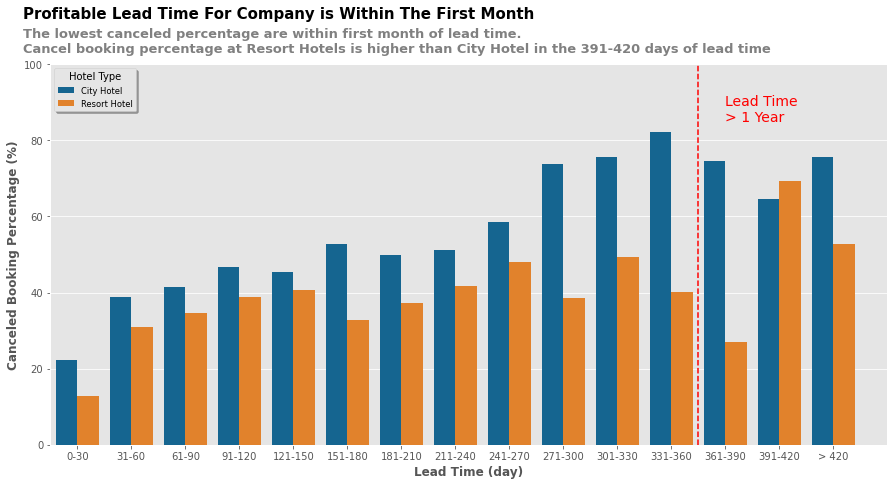

In [65]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize = (15,5)) #set figure height and width

sns.barplot(x= 'letime_group', y = 'percentage', data = df4, hue = 'hotel') #add barplot

plt.legend(title = 'Hotel Type', loc = 'upper left', shadow = True, fontsize = 'small') #setting legend
plt.axis([-0.5, 15, 0, 100]) #set y-axis limit


plt.axvline(11.5, ls='--', color='red') # add vertical line
plt.text(x= 12, y = 85, s = 'Lead Time \n> 1 Year', size = 14, color = 'red')#add text


plt.xlabel("Lead Time (day)", weight = 'bold', size = 12) #change x label name
plt.ylabel("Canceled Booking Percentage (%)", weight = 'bold', size = 12) #change y label name

#giving title
plt.text(x= -1, y = 112, s = 'Profitable Lead Time For Company is Within The First Month ', size = 15, weight = 'bold')
plt.text(x= -1, y = 103, s = 'The lowest canceled percentage are within first month of lead time.\nCancel booking percentage at Resort Hotels is higher than City Hotel in the 391-420 days of lead time', weight = 'bold',size = 13, color = 'grey');